Jonathan Mason
# Radioactive decay, Rossler system and Differential equations

A differential equation is unlike other equations because its solution is in the form of a function, or functions. Since they are so common in nature, differential equations are extremely helpful for simulating and modeling phenomena. For example, the equation for radioactive decay is a differential equation. The solution for the radioactive decay differential equation will be a function which provides an approximation of how the decay will occur over time. Another differential equation worth exploring is the Rossler system. The Rossler system of differential equations is a fascinating system of non-linear differential equations, which produces intriguing models. There are several methods to solving these differential equations. To begin to solve a differential equation, an initial value problem is often represented by, $f(t_i, y_i)$. Diving into the differential equation for radioactive decay will allow for the use of two well-known methods of solving differential equations.
<br>
<br>
__Part 1 - Radioactive Decay__
<br>
<br>
Occasionally, the nucleus of an atom will be in an unstable state. The unstable nuclei is then referred to as being radioactive. Naturally, an unstable nuclei wants to become more stable. To achieve greater stability, the atom will emit particles in a process that is known as radioactive decay. These particles are various combinations of protons and neutrons that live in the nucleus of the atom. Radioactive decay can be represented in the form of a differential equation,

$$ \frac{dN}{dt} = -\lambda N. $$

Here, $N$ is the population at a given time, $t$, and $\lambda$ is the decay constant. The exact solution to the radioactive decay differential equation has the form,

$$ N = N_0e^{-\lambda t}. $$

To understand radioactive decay the term half-life is frequently used. A half-life refers to how long it will take a given radioactive nuclei to reach half of its initial value. For example, consider an element that has a half-life of two years. After two years the unstable nuclei will be decayed to half of its initial value. In the same fashion, after four years the unstable nuclei would have decayed to a quarter of its initial value. The calculation for a half-life can be found using the equation for radioactive decay. Plug in $N_0 = 1$ and $N = \frac{1}{2}$ and solve for $T_{1/2}$,

$$ \frac{1}{2} = 1e^{-\lambda{T_{1/2}}} $$

$$ 2 = e^{\lambda{T_{1/2}}} $$

$$ \log{2} = \lambda{T_{1/2}} $$

$$ T_{1/2} = \frac{\log{2}}{\lambda}. $$

This exact solution can be used to compare other methods of solving differential equations. There are various methods of finding the solutions to the differential equation,

$$ \frac{dN}{dt} = -\lambda N. $$

Euler's method and the RK4 method are two well-known examples of methods to solve differential equations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def radioactive(N = .1, lamb = 0.1):
    """
    Returns output -lambda*N which is the RHS of the differential equation for radioactive decay.
    
    dN/dt = -lambda*N
    
    Keywords:
    N - population at given time
    lamb - decay constant
    """
    
    return -lamb*N

__Euler's Method__
<br>
<br>
Euler's method was developed by Leonhard Euler as a method to approximate differential equations. Differential equations cannot always be solved analytically, some cannot be solved at all. Euler's method provides numerical approximations of solutions to differential equations. The approximation takes inputs of an initial value of a function and step size, then attempts to find the solution with increasing precision. Euler's method is given by:

$$ y_{i+1} = y_i + hf(t_i, y_i), $$

where $h$ is stepsize, $t_i$ is time and $y_i$ is an approximate solution to the differential equation we are trying to solve. With a larger step size Euler's method can become erratic and be very unaccurate. As the step size is decreased, Euler's method will generally produce a better approximation.

In [3]:
def euler(func, h = .1, yCurrent = .1, *funcArgs):
    """
    Returns one updated step of the differential equation y' = f(t, y). Meant for one variable.
    
    Keywords:
    func - the function f in y' = f(t, y)
    h - time step
    yCurrent - current value of population y_i
    *funcArgs - parameter needed by func
    """
    
    # Initialize to 0
    
    yNext = 0.0
    
    # Calculate the next step
    
    yNext = h*func(yCurrent, *funcArgs) + yCurrent
    
    return yNext

In [4]:
# Initial population of 20
euler(radioactive, .5, 20, 1)

10.0

In [5]:
# Initial population of 10
euler(radioactive, .5, 10, 1)

5.0

In [6]:
numIter = 50
y = np.zeros(numIter)
y[0] = 50
h = 0.01
lamb = 5.0

tList = np.linspace(0, h*numIter, numIter)

for i in range(1, len(y)):
    y[i] = euler(radioactive, h, y[i-1], lamb)

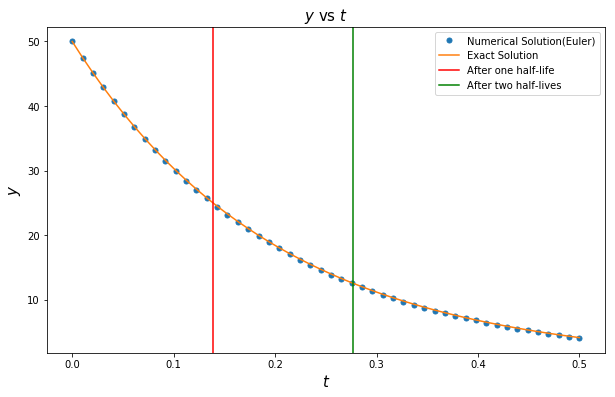

In [7]:
fig, axes = plt.subplots(figsize = (10,6))
axes.plot(tList, y, '.', markersize = 10, label = "Numerical Solution(Euler)")
axes.plot(tList, y[0]*np.exp(-lamb*tList), label = "Exact Solution")
plt.axvline(x = np.log(2)/5, color = 'r', label = "After one half-life")
plt.axvline(x = np.log(4)/5, color = 'green', label = 'After two half-lives')
axes.set_title('$y$ vs $t$', fontsize = 15)
axes.set_ylabel('$y$', fontsize = 15)
axes.set_xlabel('$t$', fontsize = 15)
plt.legend()
plt.show()

In [8]:
numIter = 50
y = np.zeros(numIter)
y[0] = 50
h = 0.1
lamb = 5.0

tList = np.linspace(0, h*numIter, numIter)

for i in range(1, len(y)):
    y[i] = euler(radioactive, h, y[i-1], lamb)

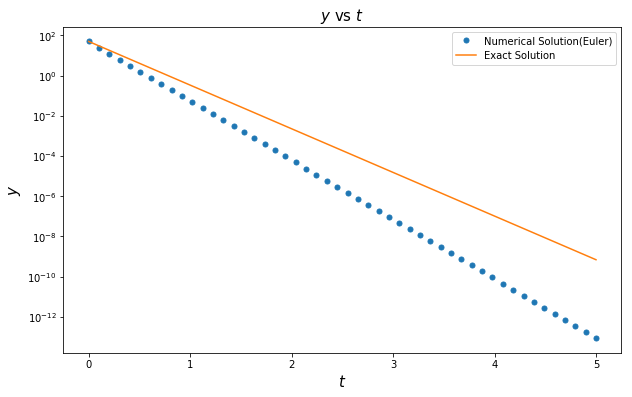

In [9]:
fig, axes = plt.subplots(figsize = (10,6))
axes.plot(tList, y, '.', markersize = 10, label = "Numerical Solution(Euler)")
axes.plot(tList, y[0]*np.exp(-lamb*tList), label = "Exact Solution")
axes.set_title('$y$ vs $t$', fontsize = 15)
axes.set_ylabel('$y$', fontsize = 15)
axes.set_xlabel('$t$', fontsize = 15)
plt.yscale("log")
plt.legend()
plt.show()

Notice the Euler Method's numerical solution boasts some hefty error at a step size of $h = 0.1$. At $t = 5$, the Euler method's numerical solution differs from the exact solution by more than four magnitudes! Keep this in mind when exploring the RK4 method.

__RK4 Method__
<br>
<br>
The Runge-Kutta methods are ways of approximating solutions to differential equations. Euler's method is actually a simple form of the Runge-Kutta methods. Euler's method is a Runge-Kutta first-order differential equation solver. This means that Euler's method only uses up to the first order of the Taylor series expansion. In comparison, the Runge-Kutta fourth-order method(RK4) will go up to the fourth order of the Taylor series expansion. The RK4 method is the more classic method for making calculations. The RK4 method is given as,

$$ y_{i+1} = y_i + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4), $$

where

$$ k_1 = f(t_i, y_i), $$

$$ k_2 = f(t_i + h/2, y_i + hk_1/2), $$

$$ k_3 = f(t_i + h/2, y_i + hk_2/2), $$

$$ k_4 = f(t_i + h, y_i + hk_3). $$

Again, $h$ is the stepsize. Furthermore, $y_i$ is the value of the numerical solution at the current step, and $y_{i+1}$ represents the next step of the numerical solution. This method can be done for any given amount of iterations.

In [10]:
def rk4(func, h = 0.1, yCurrent = 0.1, *funcArgs):
    """
    Performs one RK4 step and returns the solution at the next iteration.
    
    Keywords:
    func - function in the RHS of y' = f(t, y)
    h - time step
    yCurrent - y_i i.e. value of the numerical solution at the current step
    *funcArgs - arguments for func (RK4 does not care what they are)
    
    yNext - (output) Numerical solution at the next time step
    
    """
    
    # Initialize
    
    yNext = 0.0
    
    # Calculate k1, k2, k3, k4
    
    k1 = func(yCurrent, *funcArgs)
    k2 = func(yCurrent + h*k1/2, *funcArgs)
    k3 = func(yCurrent + h*k2/2, *funcArgs)
    k4 = func(yCurrent + h*k3, *funcArgs)
    
    # Use k1, k2, k3, k4 to calculate yNext
    
    yNext = (h/6)*(k1 + 2*k2 + 2*k3 + k4) + yCurrent
    
    return yNext

In [11]:
numIter = 50
yRK4 = np.zeros((numIter, 1))

# Set initial condition
yRK4[0] = 50
h = 0.01
lamb = 5.0

# Zero is known so we start at 1
for i in range(1, numIter):
    yRK4[i] = rk4(radioactive, h, yRK4[i-1], lamb)

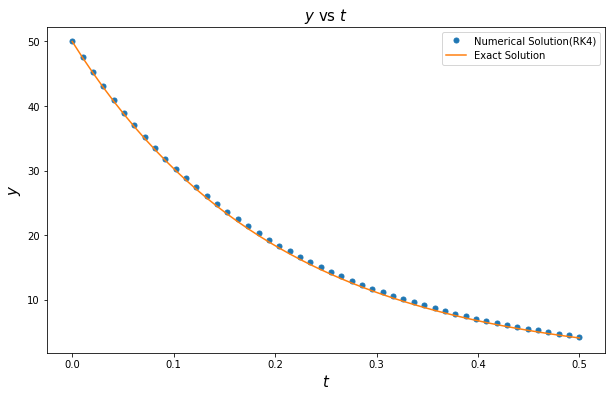

In [12]:
tList = np.linspace(0, h*numIter, numIter)

fig, axes = plt.subplots(figsize = (10,6))

axes.plot(tList, yRK4, '.', markersize = 10, label = "Numerical Solution(RK4)")
axes.plot(tList, yRK4[0]*np.exp(-lamb*tList), label = "Exact Solution")
axes.set_title('$y$ vs $t$', fontsize = 15)
axes.set_xlabel('$t$', fontsize = 15)
axes.set_ylabel('$y$', fontsize = 15)
plt.legend()
plt.show()

In [13]:
numIter = 50
yRK4 = np.zeros((numIter, 1))

# Set initial condition
yRK4[0] = 50
h = 0.1
lamb = 5.0

for i in range(1, numIter):
    yRK4[i] = rk4(radioactive, h, yRK4[i-1], lamb)

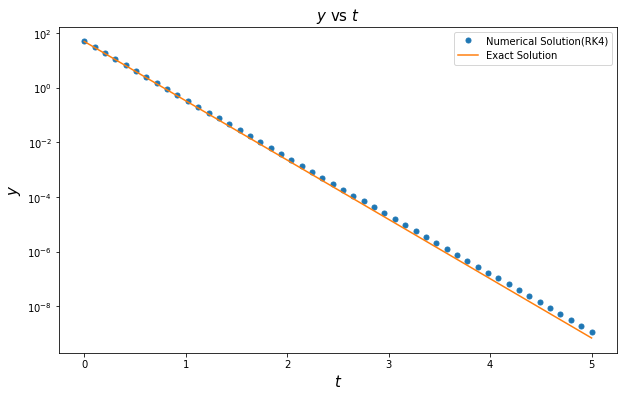

In [14]:
tList = np.linspace(0, h*numIter, numIter)

fig, axes = plt.subplots(figsize = (10, 6))

axes.plot(tList, yRK4, '.', markersize = 10, label = "Numerical Solution(RK4)")
axes.plot(tList, yRK4[0]*np.exp(-lamb*tList), label = "Exact Solution")
axes.set_title('$y$ vs $t$', fontsize = 15)
axes.set_xlabel('$t$', fontsize = 15)
axes.set_ylabel('$y$', fontsize = 15)
plt.yscale("log")
plt.legend()
plt.show()

In [15]:
yRK4[0] = 50
h = .1
lamb = 5.0

# RK4
for i in range(1, numIter):
    yRK4[i] = rk4(radioactive, h, yRK4[i-1], lamb)

# Euler
y = np.zeros(numIter)
y[0] = 50
for i in range(1, len(y)):
    y[i] = euler(radioactive, h, y[i-1], lamb)

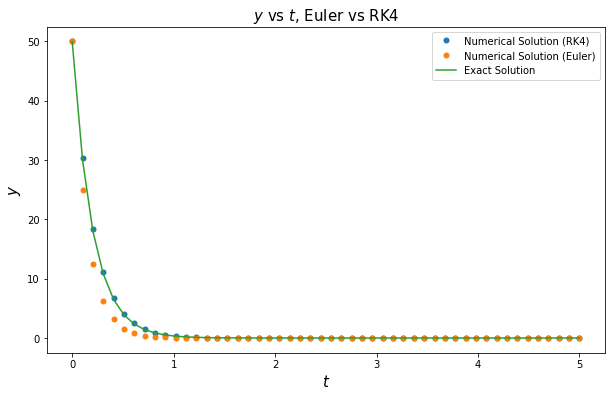

In [16]:
tList = np.linspace(0, h*numIter, numIter)

fig, axes = plt.subplots(figsize = (10, 6))

axes.plot(tList, yRK4, '.', markersize = 10, label = "Numerical Solution (RK4)")
axes.plot(tList, y, '.', markersize = 10, label = "Numerical Solution (Euler)")
axes.plot(tList, yRK4[0]*np.exp(-lamb*tList), label = "Exact Solution")
axes.set_title('$y$ vs $t$, Euler vs RK4', fontsize = 15)
axes.set_xlabel('$t$', fontsize = 15)
axes.set_ylabel('$y$', fontsize = 15)
plt.legend()
plt.show()

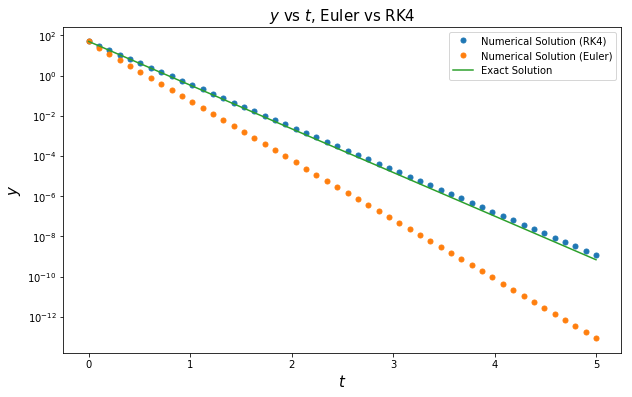

In [17]:
# Log view
tList = np.linspace(0, h*numIter, numIter)

fig, axes = plt.subplots(figsize = (10, 6))

axes.plot(tList, yRK4, '.', markersize = 10, label = "Numerical Solution (RK4)")
axes.plot(tList, y, '.', markersize = 10, label = "Numerical Solution (Euler)")
axes.plot(tList, yRK4[0]*np.exp(-lamb*tList), label = "Exact Solution")
axes.set_title('$y$ vs $t$, Euler vs RK4', fontsize = 15)
axes.set_xlabel('$t$', fontsize = 15)
axes.set_ylabel('$y$', fontsize = 15)
plt.yscale("log")
plt.legend()
plt.show()

The RK4 method is clearly performing better than Euler's method. With the same step size and lambda value the RK4 method produces a much more accurate approximation. Euler's method is a quicker way of approximating a solution. The RK4 method is more tedious, but the accuracy of RK4 is worth the extra time.

__Part 2 - Rossler Equations and Chaos__
<br>
<br>
The Rossler system of differential equations are fascinating to analyze from a mathematical point of view. The system consists of three non-linear differential equations given as,

$$ \frac{dx}{dt} = -y - z $$

$$ \frac{dy}{dt} = x + ay $$

$$ \frac{dz}{dt} = b + z(x - c). $$

Here, $a$, $b$ and $c$ act as the parameters to the system of equations. Consider the system when $z=0$, 

$$ \frac{dx}{dt} = -y $$

$$ \frac{dy}{dt} = x + ay $$

The Rossler equations produce two linear equations at $z = 0$. Hence, a plot of $y$ vs $x$ can be created. This is part of the fascination behind the Rossler system of equations and there is much more to be discovered. Varying parameters $a$, $b$, and $c$ will bring out some features of the Rossler equations which are beneficial to analyze. For example, if $a$ and $b$ are held constant with varying $c$ a plot of $y$ vs $x$ will show that the period is doubling and transitions to chaos. This will be evident on the plots as more and more loops will appears with a greater value of $c$. The "chaotic attractor" is of particular note and was studied extensively by Otto Rossler himself. The chaotic attractor has values $a = .2$, $b = .2$ and $c = 5.7$. Additionally, as $b$ and $c$ are held fixed with varying $a$ the system converges to the centrally located fixed point.
<br>
<br>
<br>
__Fixed Points of the Rossler Equations__
<br>
<br>
The fixed points for the Rossler system of equations ($x_0$, $y_0$, $z_0$) can be found by setting $\frac{dx}{dt}$, $\frac{dy}{dt}$, and $\frac{dz}{dt}$ equal to zero. The fixed points are given as,

$$ x_0 = \frac{c \pm \sqrt{c^2-4ab}}{2} $$

$$ y_0 = -\frac{c \pm \sqrt{c^2-4ab}}{2a} $$

$$ z_0 = \frac{c \pm \sqrt{c^2-4ab}}{2a}. $$

One of the fixed points will become the center of each loop. The other will lie somewhat outside of the system. Keep this in mind while analyzing the fixed points and the $y$ vs $x$ plot.

In [18]:
def fixed(a = .2, b = .2, c = 2.5):
    """
    Returns the fixed points x0, y0, z0 as a pair of values with inputs a, b and c.
    
    Keywords:
    a,b,c - parameters
    """
    x0 = np.array([(c + np.sqrt(c**2 - 4*a*b))/2 , (c - np.sqrt(c**2 - 4*a*b))/2])
    y0 = np.array([-(c + np.sqrt(c**2 - 4*a*b))/(2*a) , -(c - np.sqrt(c**2 - 4*a*b))/(2*a)])
    z0 = np.array([(c + np.sqrt(c**2 - 4*a*b))/(2*a) , (c - np.sqrt(c**2 - 4*a*b))/(2*a)])
    
    return x0, y0, z0

In [19]:
# Fixed points
x, y, z = fixed()
print(x)
print(y)
print(z)

[2.48389627 0.01610373]
[-12.41948134  -0.08051866]
[12.41948134  0.08051866]


__RK4 for Rossler Equations__
<br>
<br>
Recall that the RK4 method performed better than the Euler method for approximating radioactive decay. Thus, for approximating numerical solutions to the Rossler system of equations the RK4 method will be the method of choice. Unlike the radioactive decay differential equation which had one variable, the Rossler system will have three variables. The RK4 method will still accept the Rossler system of equations, but for ease of computation the variables must be put in the form of an array.

In [20]:
def rossler(y = np.array([x, y, z]), a = .2, b = .2, c = 2.5):
    """
    Function takes in the parameters of the Rossler system and returns each equation together in the form of an array.
    
    Keywords:
    f1 - dx/dt
    f2 - dy/dt
    f3 - dz/dt
    """
    
    f1 = -y[1] - y[2]
    f2 = y[0] + a*y[1]
    f3 = b + y[2]*(y[0] - c)
    
    return np.array([f1, f2, f3])

In [21]:
# Check that its working properly
rossler()

array([[ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [-1.30451205e-15, -1.30451205e-15]])

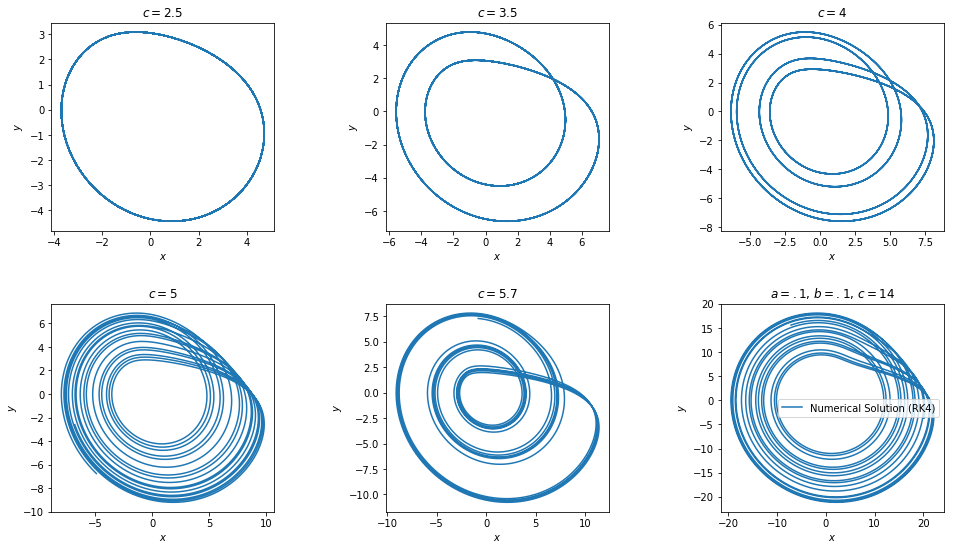

In [22]:
numIter = 80000
yRK4 = np.zeros((numIter, 3))

# Set initial conditions
yRK4[0, 0] = 0.5
h = 0.01
a = .2
b = .2

fig, axes = plt.subplots(2, 3, figsize = (16,9))
fig.subplots_adjust(hspace = .35)
fig.subplots_adjust(wspace = .50)

# Holding a,b constant vary c
c = 2.5
for i in range(1, numIter):
    yRK4[i, :] = rk4(rossler, h, yRK4[i-1, :], a, b, c)
axes[0][0].plot(yRK4[70000:, 0], yRK4[70000:, 1], markersize = 8, label = "Numerical Solution (RK4)")
axes[0][0].set_title('$c = 2.5$')
axes[0][0].set_xlabel('$x$')
axes[0][0].set_ylabel('$y$')

c = 3.5
for i in range(1, numIter):
    yRK4[i, :] = rk4(rossler, h, yRK4[i-1, :], a, b, c)
axes[0][1].plot(yRK4[70000:, 0], yRK4[70000:, 1], markersize = 8, label = "Numerical Solution (RK4)")
axes[0][1].set_title('$c = 3.5$')
axes[0][1].set_xlabel('$x$')
axes[0][1].set_ylabel('$y$')

c = 4
for i in range(1, numIter):
    yRK4[i, :] = rk4(rossler, h, yRK4[i-1, :], a, b, c)
axes[0][2].plot(yRK4[70000:, 0], yRK4[70000:, 1], markersize = 8, label = "Numerical Solution (RK4)")
axes[0][2].set_title('$c = 4$')
axes[0][2].set_xlabel('$x$')
axes[0][2].set_ylabel('$y$')

c = 5
for i in range(1, numIter):
    yRK4[i, :] = rk4(rossler, h, yRK4[i-1, :], a, b, c)
axes[1][0].plot(yRK4[70000:, 0], yRK4[70000:, 1], markersize = 8, label = "Numerical Solution (RK4)")
axes[1][0].set_title('$c = 5$')
axes[1][0].set_xlabel('$x$')
axes[1][0].set_ylabel('$y$')

c = 5.7
for i in range(1, numIter):
    yRK4[i, :] = rk4(rossler, h, yRK4[i-1, :], a, b, c)
axes[1][1].plot(yRK4[70000:, 0], yRK4[70000:, 1], markersize = 8, label = "Numerical Solution (RK4)")
axes[1][1].set_title('$c = 5.7$')
axes[1][1].set_xlabel('$x$')
axes[1][1].set_ylabel('$y$')

# Change a,b to see a possibly chaotic plot
a = .1
b = .1
c = 14
for i in range(1, numIter):
    yRK4[i, :] = rk4(rossler, h, yRK4[i-1, :], a, b, c)
axes[1][2].plot(yRK4[70000:, 0], yRK4[70000:, 1], markersize = 8, label = "Numerical Solution (RK4)")
axes[1][2].set_title('$a = .1$, $b = .1$, $c = 14$')
axes[1][2].set_xlabel('$x$')
axes[1][2].set_ylabel('$y$')

plt.legend()
plt.show()

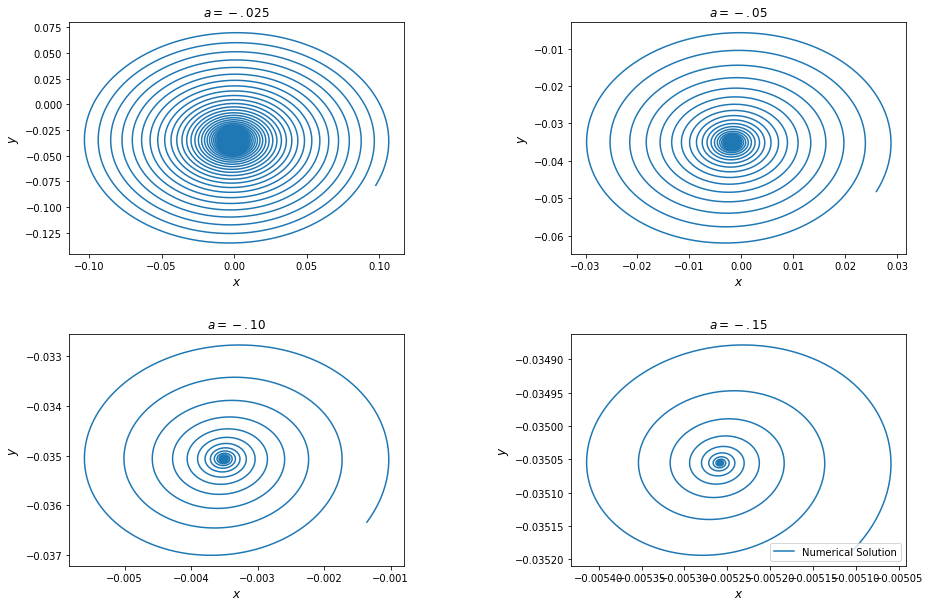

In [23]:
# a < 0
numIter = 80000
yRK4 = np.zeros((numIter, 3))

# Set initial conditions
yRK4[0, 0] = 0.5
h = 0.05
a = -.025 # Analyze as a decreases
b = .2 # Fixed
c = 5.7 # Fixed

# Zero is known so we start at 1
for i in range(1, numIter):
    yRK4[i, :] = rk4(rossler, h, yRK4[i-1, :], a, b, c)
    
fig, axes = plt.subplots(2, 2, figsize = (15, 10))
fig.subplots_adjust(hspace = .35)
fig.subplots_adjust(wspace = .50)

axes[0][0].plot(yRK4[2000:, 0], yRK4[2000:, 1], markersize = 8, label = "Numerical Solution") # Throw out first 2000 iterations
axes[0][0].set_title('$a = -.025$', fontsize = 12)
axes[0][0].set_ylabel('$y$', fontsize = 12)
axes[0][0].set_xlabel('$x$', fontsize = 12)

a = -.05
for i in range(1, numIter):
    yRK4[i, :] = rk4(rossler, h, yRK4[i-1, :], a, b, c)
axes[0][1].plot(yRK4[2000:, 0], yRK4[2000:, 1], markersize = 8, label = "Numerical Solution") # Throw out first 2000 iterations
axes[0][1].set_title('$a = -.05$', fontsize = 12)
axes[0][1].set_ylabel('$y$', fontsize = 12)
axes[0][1].set_xlabel('$x$', fontsize = 12)

a = -.10
for i in range(1, numIter):
    yRK4[i, :] = rk4(rossler, h, yRK4[i-1, :], a, b, c)
axes[1][0].plot(yRK4[2000:, 0], yRK4[2000:, 1], markersize = 8, label = "Numerical Solution") # Throw out first 2000 iterations
axes[1][0].set_title('$a = -.10$', fontsize = 12)
axes[1][0].set_ylabel('$y$', fontsize = 12)
axes[1][0].set_xlabel('$x$', fontsize = 12)

a = -.15
for i in range(1, numIter):
    yRK4[i, :] = rk4(rossler, h, yRK4[i-1, :], a, b, c)
axes[1][1].plot(yRK4[2000:, 0], yRK4[2000:, 1], markersize = 8, label = "Numerical Solution") # Throw out first 2000 iterations
axes[1][1].set_title('$a = -.15$', fontsize = 12)
axes[1][1].set_ylabel('$y$', fontsize = 12)
axes[1][1].set_xlabel('$x$', fontsize = 12)

plt.legend()
plt.show()

In [24]:
# Fixed Points
x, y, z = fixed(a = -.025, b = .2, c = 5.7)
print(x)
print(y)
print(z)

[ 5.70087706e+00 -8.77058030e-04]
[ 2.28035082e+02 -3.50823212e-02]
[-2.28035082e+02  3.50823212e-02]


__Periodicity__
<br>
<br>
The Rossler equations can also be plotted as $y$ vs $t$ and $x$ vs $t$. This will help to analyze the trends in the $y$ vs $x$ plots above. The oscillation of both $y$ vs $t$ and $x$ vs $t$ show periodicity. This is no surprise as periodicity is expected after analyzing the plots above. The formation of multiple loops on the $y$ vs $x$ plots hints at periodicty.

In [25]:
numIter = 80000
yRK4 = np.zeros((numIter, 3))

# Set initial conditions
yRK4[0, 0] = 0.5
h = 0.01
a = .2
b = .2
c = 3.5

# Zero is known so we start at 1
for i in range(1, numIter):
    yRK4[i, :] = rk4(rossler, h, yRK4[i-1, :], a, b, c)

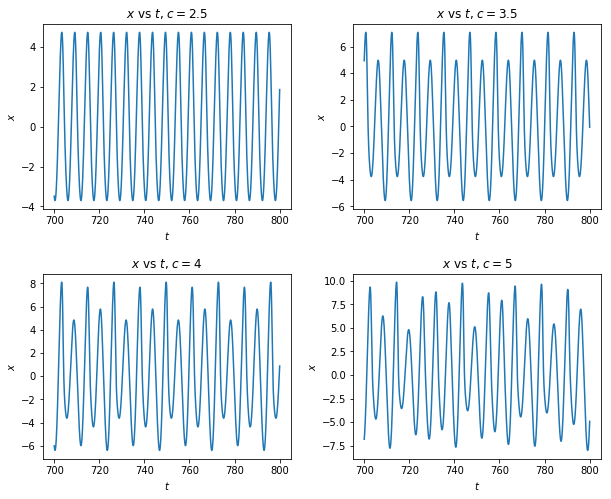

In [26]:
tList = np.linspace(0, h*numIter, numIter)

# Plot x vs t
fig, axes = plt.subplots(2, 2, figsize = (10,8))
fig.subplots_adjust(hspace = .35)
fig.subplots_adjust(wspace = .25)

c = 2.5
for i in range(1, numIter):
    yRK4[i, :] = rk4(rossler, h, yRK4[i-1, :], a, b, c)
axes[0][0].plot(tList[70000:], yRK4[70000:, 0])
axes[0][0].set_title('$x$ vs $t$, $c = 2.5$')
axes[0][0].set_xlabel('$t$')
axes[0][0].set_ylabel('$x$')

c = 3.5
for i in range(1, numIter):
    yRK4[i, :] = rk4(rossler, h, yRK4[i-1, :], a, b, c)
axes[0][1].plot(tList[70000:], yRK4[70000:, 0])
axes[0][1].set_title('$x$ vs $t$, $c = 3.5$')
axes[0][1].set_xlabel('$t$')
axes[0][1].set_ylabel('$x$')

c = 4
for i in range(1, numIter):
    yRK4[i, :] = rk4(rossler, h, yRK4[i-1, :], a, b, c)
axes[1][0].plot(tList[70000:], yRK4[70000:, 0])
axes[1][0].set_title('$x$ vs $t$, $c = 4$')
axes[1][0].set_xlabel('$t$')
axes[1][0].set_ylabel('$x$')

c = 5
for i in range(1, numIter):
    yRK4[i, :] = rk4(rossler, h, yRK4[i-1, :], a, b, c)
axes[1][1].plot(tList[70000:], yRK4[70000:, 0])
axes[1][1].set_title('$x$ vs $t$, $c = 5$')
axes[1][1].set_xlabel('$t$')
axes[1][1].set_ylabel('$x$')

plt.show()

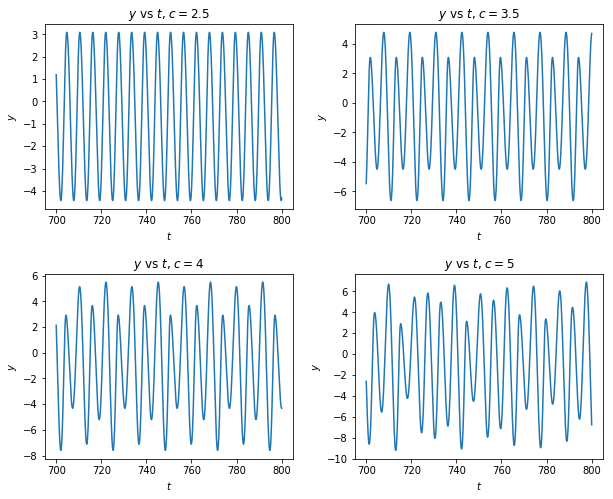

In [27]:
tList = np.linspace(0, h*numIter, numIter)

# Plot y vs t
fig, axes = plt.subplots(2, 2, figsize = (10,8))
fig.subplots_adjust(hspace = .35)
fig.subplots_adjust(wspace = .25)

c = 2.5
for i in range(1, numIter):
    yRK4[i, :] = rk4(rossler, h, yRK4[i-1, :], a, b, c)
axes[0][0].plot(tList[70000:], yRK4[70000:, 1])
axes[0][0].set_title('$y$ vs $t$, $c = 2.5$')
axes[0][0].set_xlabel('$t$')
axes[0][0].set_ylabel('$y$')

c = 3.5
for i in range(1, numIter):
    yRK4[i, :] = rk4(rossler, h, yRK4[i-1, :], a, b, c)
axes[0][1].plot(tList[70000:], yRK4[70000:, 1])
axes[0][1].set_title('$y$ vs $t$, $c = 3.5$')
axes[0][1].set_xlabel('$t$')
axes[0][1].set_ylabel('$y$')

c = 4
for i in range(1, numIter):
    yRK4[i, :] = rk4(rossler, h, yRK4[i-1, :], a, b, c)
axes[1][0].plot(tList[70000:], yRK4[70000:, 1])
axes[1][0].set_title('$y$ vs $t$, $c = 4$')
axes[1][0].set_xlabel('$t$')
axes[1][0].set_ylabel('$y$')

c = 5
for i in range(1, numIter):
    yRK4[i, :] = rk4(rossler, h, yRK4[i-1, :], a, b, c)
axes[1][1].plot(tList[70000:], yRK4[70000:, 1])
axes[1][1].set_title('$y$ vs $t$, $c = 5$')
axes[1][1].set_xlabel('$t$')
axes[1][1].set_ylabel('$y$')

plt.show()

__Rossler Equations in 3D__
<br>
<br>
Up until now all of the plotting had been done assuming $z = 0$. What do the Rossler equations look like when $z \neq{0}$? The 3D Rossler plot will feature a structure that is composed of two "bands". One of these bands is known as the Mobius band. The Mobius band is popular in the sciences because it has the unique property of being unorientable. In other words, the band has no inside or outside, it has only has one surface.

In [28]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

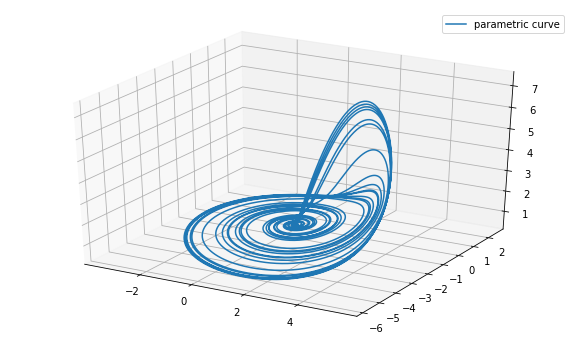

In [29]:
numIter = 80000
yRK4 = np.zeros((numIter, 3))

# Set initial conditions
yRK4[0, 0] = 0.5
h = 0.01
a = .432
b = 2
c = 4

# Zero is known so we start at 1
for i in range(1, numIter):
    yRK4[i, :] = rk4(rossler, h, yRK4[i-1, :], a, b, c)

mpl.rcParams['legend.fontsize'] = 10
fig = plt.figure(figsize = (10,6))
ax = fig.gca(projection='3d')
ax.plot(yRK4[60000:, 0], yRK4[60000:, 1], yRK4[60000:, 2], label='parametric curve')
ax.legend()
plt.show()

__Conclusion__
<br>
<br>
Differential equations allow for mathematical analysis that other equations do not provide. The analysis of the Rossler system showed that differential equations are interesting to work with and can produce some fascinating trajectories, especially in 3D. Working with the radioactive decay equation helped determine the RK4 methods of solving differential equations is more accurate at approximation than Euler's; however it still had error. As mathematicians continue to study differential equations, perhaps an even better method of approximating their solutions will arise.
<br>
<br>
<br>
Sources:
<br>
https://en.wikipedia.org/wiki/Radioactive_decay
<br>
https://en.wikipedia.org/wiki/Euler_method
<br>
https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods
<br>
https://en.wikipedia.org/wiki/R%C3%B6ssler_attractor
<br>
https://en.wikipedia.org/wiki/M%C3%B6bius_strip